<a href="https://colab.research.google.com/github/JuanJGalindo/ML-Theory/blob/main/Tarea3/L2Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea y Contexto**

Implementar un modelo de regresión lineal por mínimos cuadrados a partir de los siguientes tipos de soluciones:

1.   Solución Analítica con Regularización Ridge
2.   Solución por SVD con Regularización Ridge
3.   Solución Iterativa con Gradiente Descendente y Regularización


**Modelo:**

$Y = X\alpha^T$

**Función de Pérdida:**

$\mathcal{L} = |\hat{Y}-X\alpha^T|_2^2$

**Optimización:**

$\alpha^T = (X^TX + \lambda I)^{-1}X^TY$

**Descomposición en Valores Singulares:**

$
\begin{align}
X &= U \Sigma V^\top \\[6pt]
S_{\text{ridge},i} &= \frac{\sigma_i}{\sigma_i^2 + \lambda} \\[6pt]
\alpha^T_{\text{ridge}} &= V \, \text{diag}(S_{\text{ridge}}) \, U^\top y
\end{align}
$



## **Prueba Preliminar con ToySet**

### **Carga de Datos desde ToySet**

In [274]:
# ToySet Import
from sklearn.datasets import make_regression

N = 1000   # Samples
P = 20     # Features

# X-y Regression Variables
X, y = make_regression(n_samples=N, n_features=P,
                       noise=1, random_state=42)

print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


### **Visualización de ToySet**

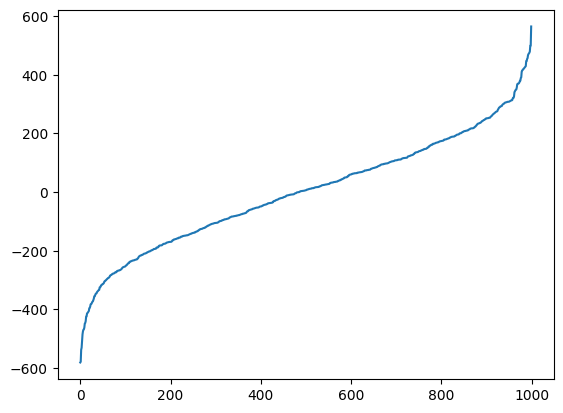

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Y Visualization Over Occurrence Number
plt.plot(np.sort(y))
plt.show()

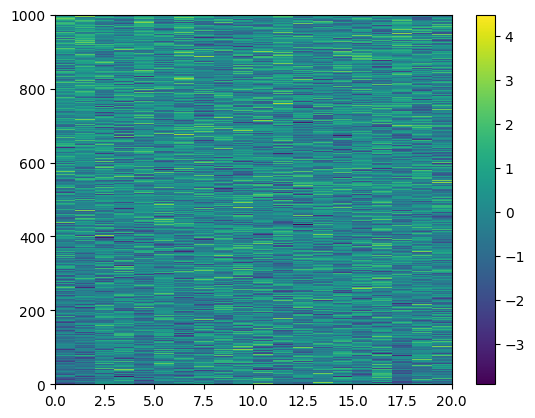

In [276]:
ind_ = np.argsort(y)    # Array Index Sorting
plt.pcolormesh(X[ind_]) # Heatmap of X Matrix over ind_ index mask
plt.colorbar()
plt.show()

### **Implementación de Solución Analítica**

In [277]:
# Regression Function
def l2_reg(X, y, lamb_ = 1e-3):
  return np.linalg.inv((X.T @ X) + lamb_*np.eye(X.shape[1])) @ X.T @ y

In [278]:
# Regression Performing
alpha = l2_reg(X, y)
y_pred = X.dot(alpha)
print(f"Y Original:  [{' '.join(f'{val:.3f}' for val in y[:10])}]")
print(f"Y Predicted: [{' '.join(f'{val:.3f}' for val in y_pred[:10])}]")
print(alpha)

Y Original:  [4.082 -254.019 188.576 -179.267 -47.241 240.383 -151.700 49.530 -3.591 -155.066]
Y Predicted: [2.865 -254.711 188.984 -179.679 -48.125 238.902 -150.867 50.656 -5.358 -154.797]
[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


### **Revisión de Solución Analítica**

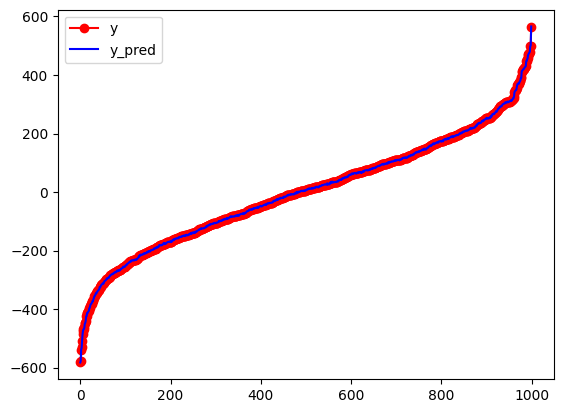

In [279]:
# Precision Comparison - y/y_pred
plt.plot(y[ind_], c='r', marker='o', label='y')
plt.plot(y_pred[ind_], c='b', label='y_pred')
plt.legend()
plt.show()

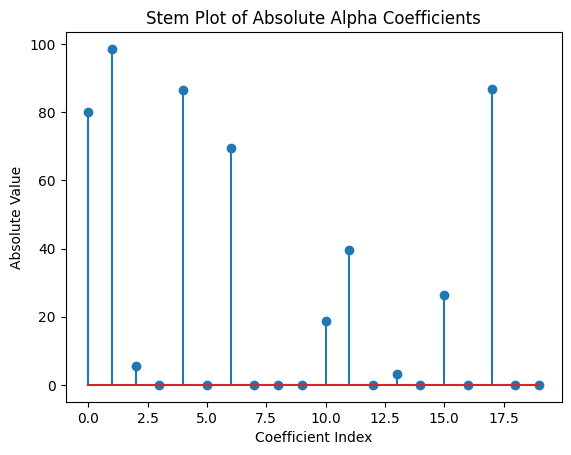

In [280]:
# Alpha Weights - Visualization and Comparison
plt.stem(np.arange(len(alpha)), np.abs(alpha))
plt.title("Stem Plot of Absolute Alpha Coefficients")
plt.xlabel("Coefficient Index")
plt.ylabel("Absolute Value")
plt.show()

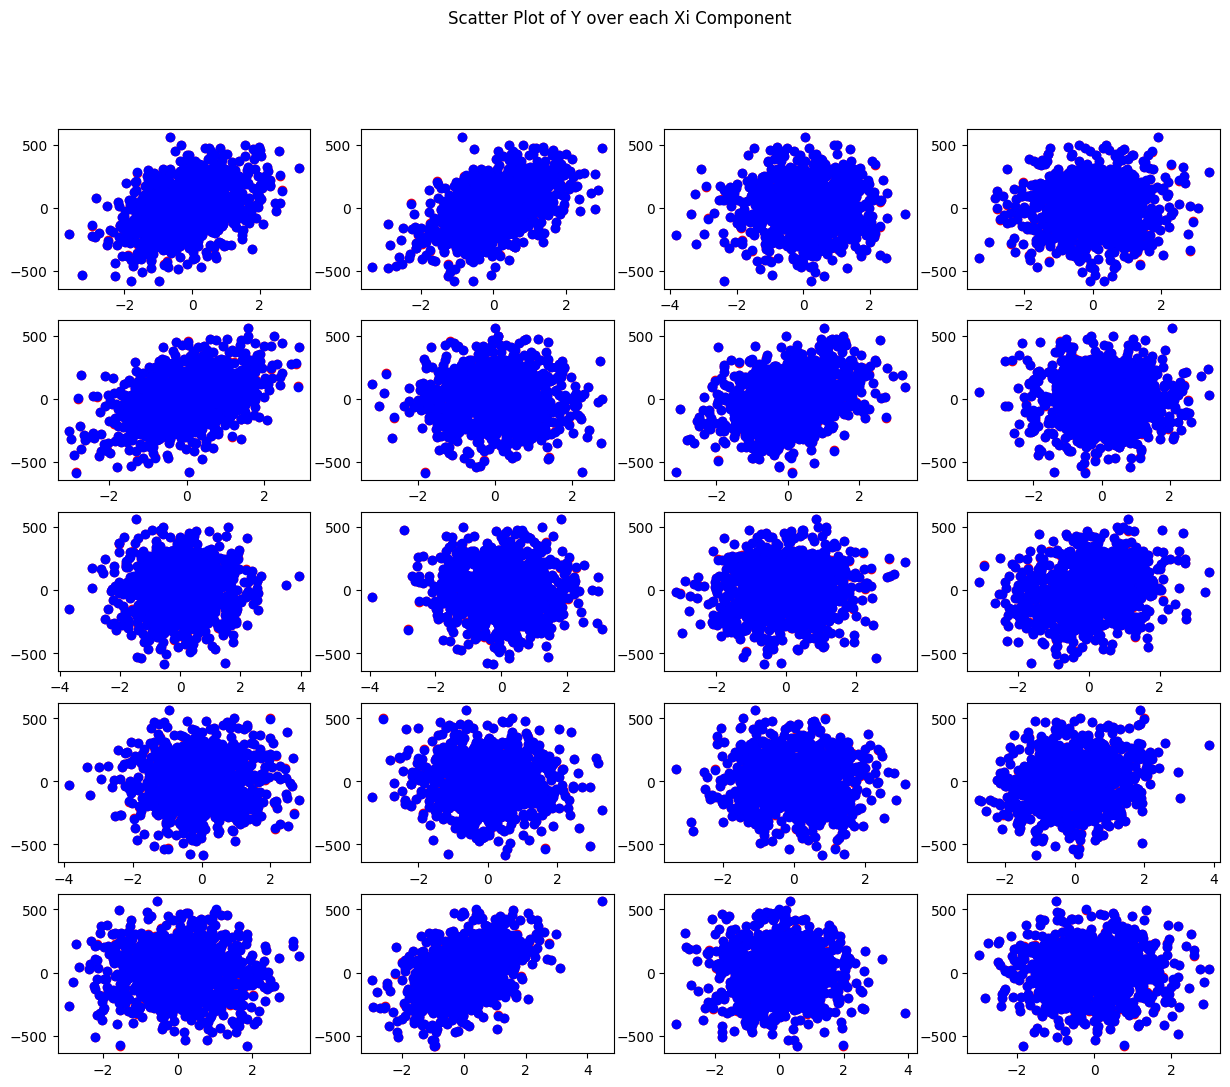

In [281]:
# Coordinated Scatters for Y = f(Xi, alpha)
fig, axs = plt.subplots(5, 4, figsize=(15, 12))

for i in range(5):
  for j in range(4):
    axs[i, j].scatter(X[ind_, i*4+j], y[ind_],      c='r', label='y')
    axs[i, j].scatter(X[ind_, i*4+j], y_pred[ind_], c='b', label='y_pred')

fig.suptitle("Scatter Plot of Y over each Xi Component")
fig.show()

## **Importe de Dataset Real**

### **Carga de Datos de Dataset Real**

In [282]:
# ToySet Import
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [283]:
# X-y Regression Variables
X = housing.data
y = housing.target

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


### **Visualización de ToySet**

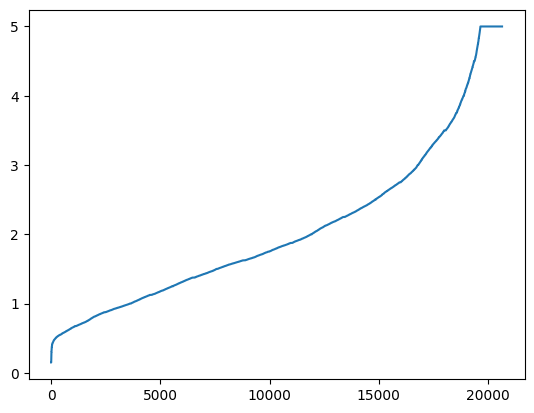

In [284]:
import matplotlib.pyplot as plt
import numpy as np

# Y Visualization Over Occurrence Number
plt.plot(np.sort(y))
plt.show()

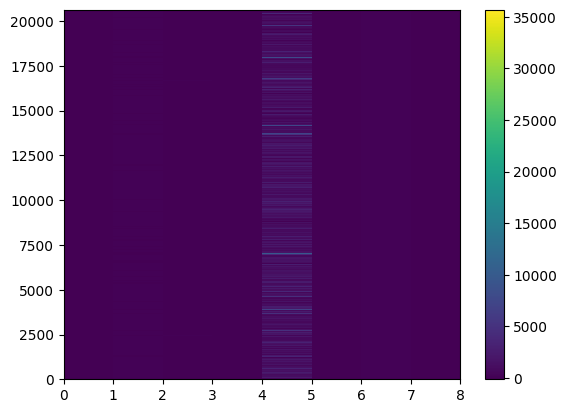

In [285]:
ind_ = np.argsort(y)    # Array Index Sorting
plt.pcolormesh(X[ind_]) # Heatmap of X Matrix over ind_ index mask
plt.colorbar()
plt.show()

### **Implementación de Solución Analítica**

In [286]:
# Regression Performing
alpha = l2_reg(X, y)
y_pred = X.dot(alpha)
print(f"Y Original:  [{' '.join(f'{val:.3f}' for val in y[:10])}]")
print(f"Y Predicted: [{' '.join(f'{val:.3f}' for val in y_pred[:10])}]")
print(alpha)

Y Original:  [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]
Y Predicted: [4.098 3.884 3.529 3.153 2.154 2.548 2.197 2.043 1.492 2.244]
[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


### **Revisión de Solución Analítica**

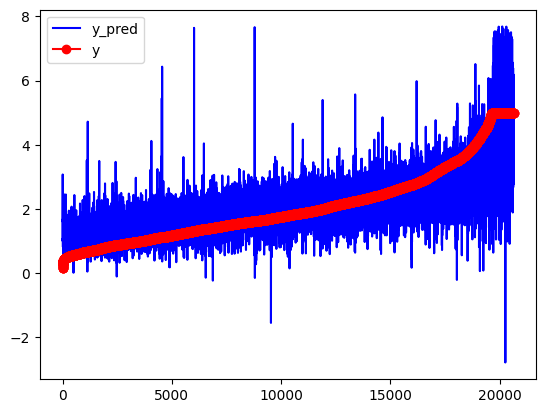

In [287]:
# Precision Comparison - y/y_pred
plt.plot(y_pred[ind_], c='b', label='y_pred')
plt.plot(y[ind_], c='r', marker='o', label='y')
plt.legend()
plt.show()

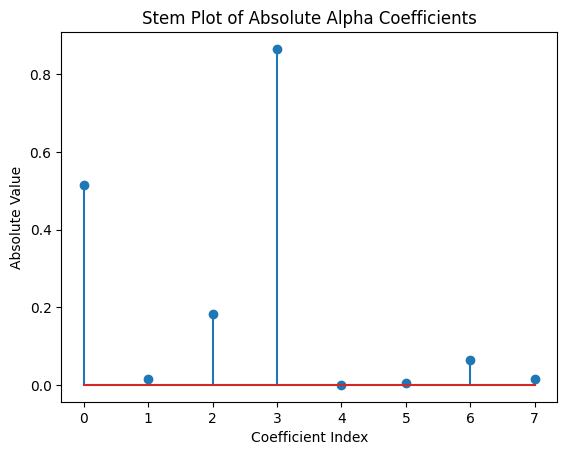

In [288]:
# Alpha Weights - Visualization and Comparison
plt.stem(np.arange(len(alpha)), np.abs(alpha))
plt.title("Stem Plot of Absolute Alpha Coefficients")
plt.xlabel("Coefficient Index")
plt.ylabel("Absolute Value")
plt.show()

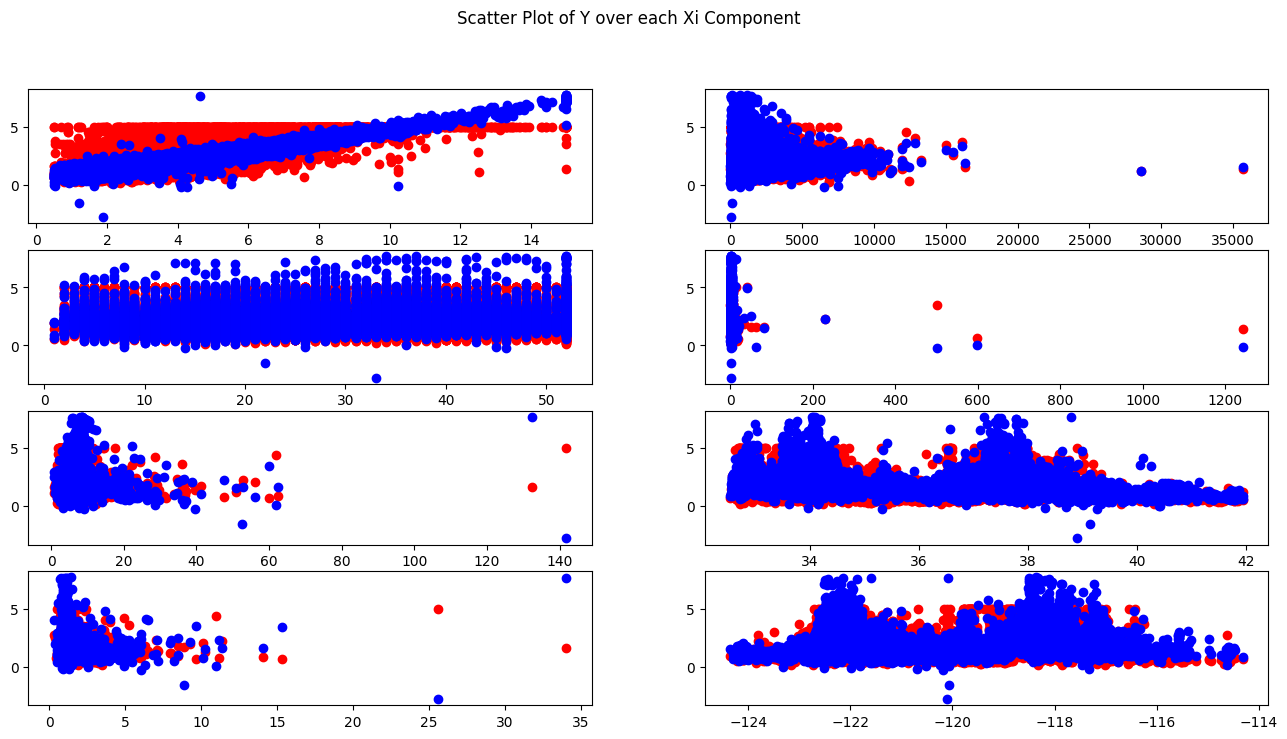

In [289]:
# Coordinated Scatters for Y = f(Xi, alpha)
fig, axs = plt.subplots(4, 2, figsize=(16, 8))

for i in range(4):
  for j in range(2):
    axs[i, j].scatter(X[ind_, i+j*4], y[ind_],      c='r', label='y')
    axs[i, j].scatter(X[ind_, i+j*4], y_pred[ind_], c='b', label='y_pred')

fig.suptitle("Scatter Plot of Y over each Xi Component")
fig.show()

### **Implementación de Solución con SVD**

In [290]:
# Regression Function using SVD
def svd_reg(X, y, lamb_ = 1e-3):
  U, S, Vt = np.linalg.svd(X, full_matrices=False)
  # Add regularization to singular values
  S_reg = S / (S**2 + lamb_)
  alpha_svd = Vt.T @ np.diag(S_reg) @ U.T @ y
  return alpha_svd, S_reg

In [291]:
# Regression Performing with SVD
alpha_svd, S = svd_reg(X, y)
y_pred_svd = X.dot(alpha_svd)

print(f"Y Original:  [{' '.join(f'{val:.3f}' for val in y[:10])}]")
print(f"Y Predicted (Analytic): [{' '.join(f'{val:.3f}' for val in y_pred[:10])}]")
print(f"Y Predicted (SVD): [{' '.join(f'{val:.3f}' for val in y_pred_svd[:10])}]")
print(alpha_svd)

Y Original:  [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]
Y Predicted (Analytic): [4.098 3.884 3.529 3.153 2.154 2.548 2.197 2.043 1.492 2.244]
Y Predicted (SVD): [4.098 3.884 3.529 3.153 2.154 2.548 2.197 2.043 1.492 2.244]
[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


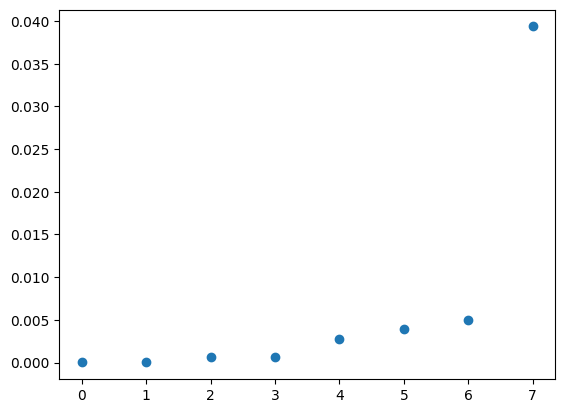

In [292]:
# Visualización de Valores Singulares
plt.scatter(np.arange(S.shape[0]), S)
plt.show()

### **Revisión de Solución con SVD**

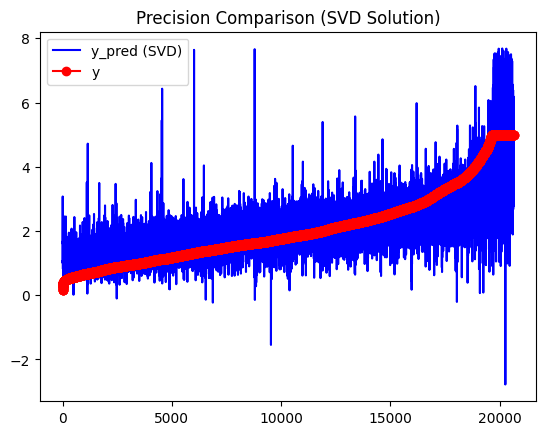

In [293]:
# Precision Comparison - y/y_pred (SVD)
plt.plot(y_pred_svd[ind_], c='b', label='y_pred (SVD)')
plt.plot(y[ind_], c='r', marker='o', label='y')
plt.legend()
plt.title("Precision Comparison (SVD Solution)")
plt.show()

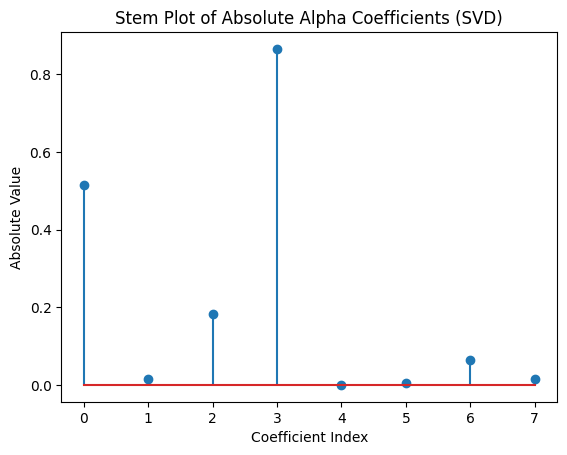

In [294]:
# Alpha Weights - Visualization and Comparison (SVD)
plt.stem(np.arange(len(alpha_svd)), np.abs(alpha_svd))
plt.title("Stem Plot of Absolute Alpha Coefficients (SVD)")
plt.xlabel("Coefficient Index")
plt.ylabel("Absolute Value")
plt.show()

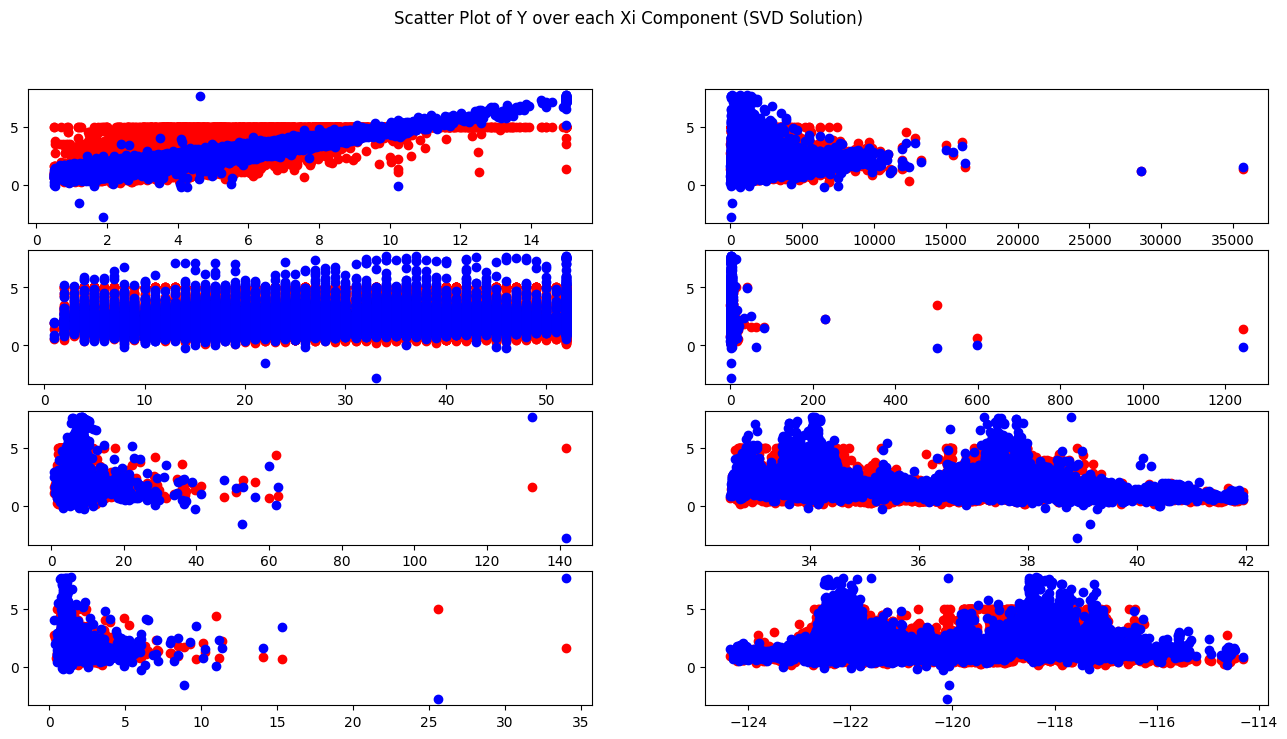

In [295]:
# Coordinated Scatters for Y = f(Xi, alpha) (SVD)
fig, axs = plt.subplots(4, 2, figsize=(16, 8))

for i in range(4):
  for j in range(2):
    feature_index = i + j * 4
    if feature_index < X.shape[1]:
        axs[i, j].scatter(X[ind_, feature_index], y[ind_], c='r', label='y')
        axs[i, j].scatter(X[ind_, feature_index], y_pred_svd[ind_], c='b', label='y_pred (SVD)')

fig.suptitle("Scatter Plot of Y over each Xi Component (SVD Solution)")
fig.show()

### **Comparación de Alpha Analítico y Alpha por SVD**

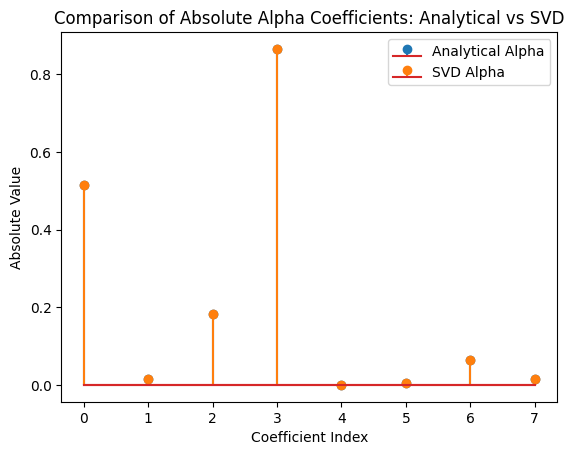

In [296]:
# Compare Alpha from Analytical and SVD solutions
plt.stem(np.arange(len(alpha)), np.abs(alpha), linefmt='C0-', markerfmt='C0o', label='Analytical Alpha')
plt.stem(np.arange(len(alpha_svd)), np.abs(alpha_svd), linefmt='C1-', markerfmt='C1o', label='SVD Alpha')
plt.title("Comparison of Absolute Alpha Coefficients: Analytical vs SVD")
plt.xlabel("Coefficient Index")
plt.ylabel("Absolute Value")
plt.legend()
plt.show()

### **Implementación de Solución Iterativa**

In [297]:
# Regression Function using Gradient Descent
def gd_reg(X, y, learning_rate=0.01, n_iterations=1000, tolerance=1e-6, lamb_=1e-3):
    """
    Performs linear regression using gradient descent with L2 regularization.

    Args:
        X (np.ndarray): The input features.
        y (np.ndarray): The target variable.
        learning_rate (float): The step size for the gradient descent.
        n_iterations (int): The maximum number of iterations.
        tolerance (float): The stopping criterion based on the change in MSE.
        lamb_ (float): The regularization parameter (lambda).

    Returns:
        np.ndarray: The learned coefficients (alpha).
        list: A list of MSE values at each iteration.
    """
    m, n = X.shape  # Number of samples and features
    alpha = np.zeros(n)  # Initialize coefficients to zeros
    mse_history = []

    for i in range(n_iterations):
        y_pred = X.dot(alpha)
        loss = y_pred - y
        # Gradient of the MSE with L2 regularization
        gradient = (2/m) * X.T.dot(loss) + 2 * lamb_ * alpha
        alpha = alpha - learning_rate * gradient

        mse = np.mean(loss**2) + lamb_ * np.sum(alpha**2) # Calculate MSE with regularization
        mse_history.append(mse)

        if i % 100000 == 0:
          print(f"Iteration #{i}: {mse}")

        # Stoppage feature: Check if MSE is not substantially better
        #if i > 0 and abs(mse_history[-2] - mse_history[-1]) < tolerance:
            #print(f"Stopping early at iteration {i} due to small change in MSE.")
            #break

    return alpha, mse_history

In [298]:
# Regression Performing
alpha_iter, mse_history = gd_reg(X, y, learning_rate=3e-7, n_iterations=int(2.5e6)) # Reduced learning rate and increased iterations
y_pred_iter = X.dot(alpha)
print(f"Y Original:  [{' '.join(f'{val:.3f}' for val in y[:10])}]")
print(f"Y Predicted: [{' '.join(f'{val:.3f}' for val in y_pred_iter[:10])}]")
print(alpha_iter)

Iteration #0: 5.610483202074747
Iteration #100000: 1.05966965686022
Iteration #200000: 0.9061871012129716
Iteration #300000: 0.8112032761487443
Iteration #400000: 0.7507480045186119
Iteration #500000: 0.7114138801026526
Iteration #600000: 0.6853891483819112
Iteration #700000: 0.6679499829602341
Iteration #800000: 0.6561483718731366
Iteration #900000: 0.6480975804603791
Iteration #1000000: 0.6425665972984067
Iteration #1100000: 0.6387406704726841
Iteration #1200000: 0.6360748797633755
Iteration #1300000: 0.6342019690639241
Iteration #1400000: 0.6328730020170613
Iteration #1500000: 0.6319184947264583
Iteration #1600000: 0.6312226402645128
Iteration #1700000: 0.630706060539551
Iteration #1800000: 0.630314189012797
Iteration #1900000: 0.6300094085069622
Iteration #2000000: 0.629765710985347
Iteration #2100000: 0.6295650597974441
Iteration #2200000: 0.6293949055291362
Iteration #2300000: 0.6292464858178213
Iteration #2400000: 0.6291136591936459
Y Original:  [4.526 3.585 3.521 3.413 3.422 2.

### **Revisión de Solución Iterativa**

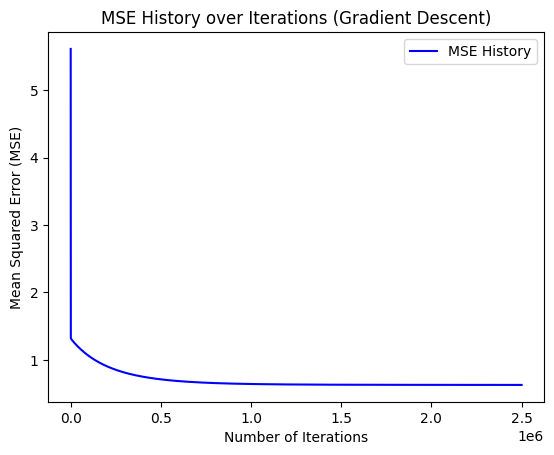

In [299]:
plt.plot(mse_history, c='b', label='MSE History')
plt.title("MSE History over Iterations (Gradient Descent)")
plt.xlabel("Number of Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()

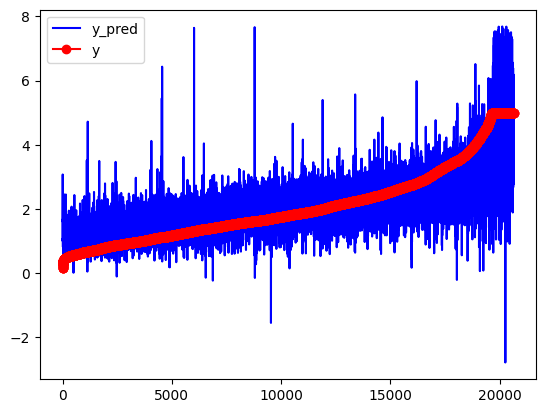

In [300]:
# Precision Comparison - y/y_pred
plt.plot(y_pred_iter[ind_], c='b', label='y_pred')
plt.plot(y[ind_], c='r', marker='o', label='y')
plt.legend()
plt.show()

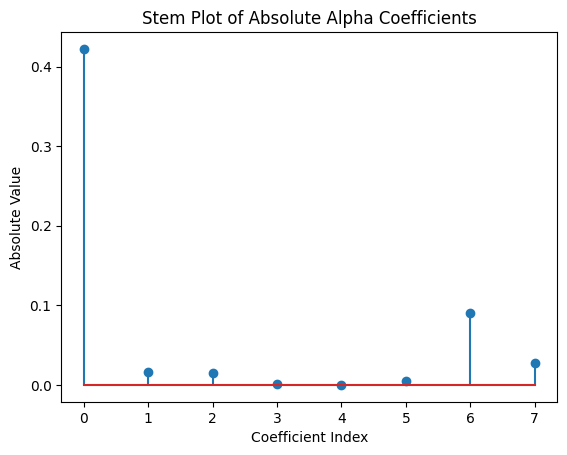

In [301]:
# Alpha Weights - Visualization and Comparison
plt.stem(np.arange(len(alpha_iter)), np.abs(alpha_iter))
plt.title("Stem Plot of Absolute Alpha Coefficients")
plt.xlabel("Coefficient Index")
plt.ylabel("Absolute Value")
plt.show()

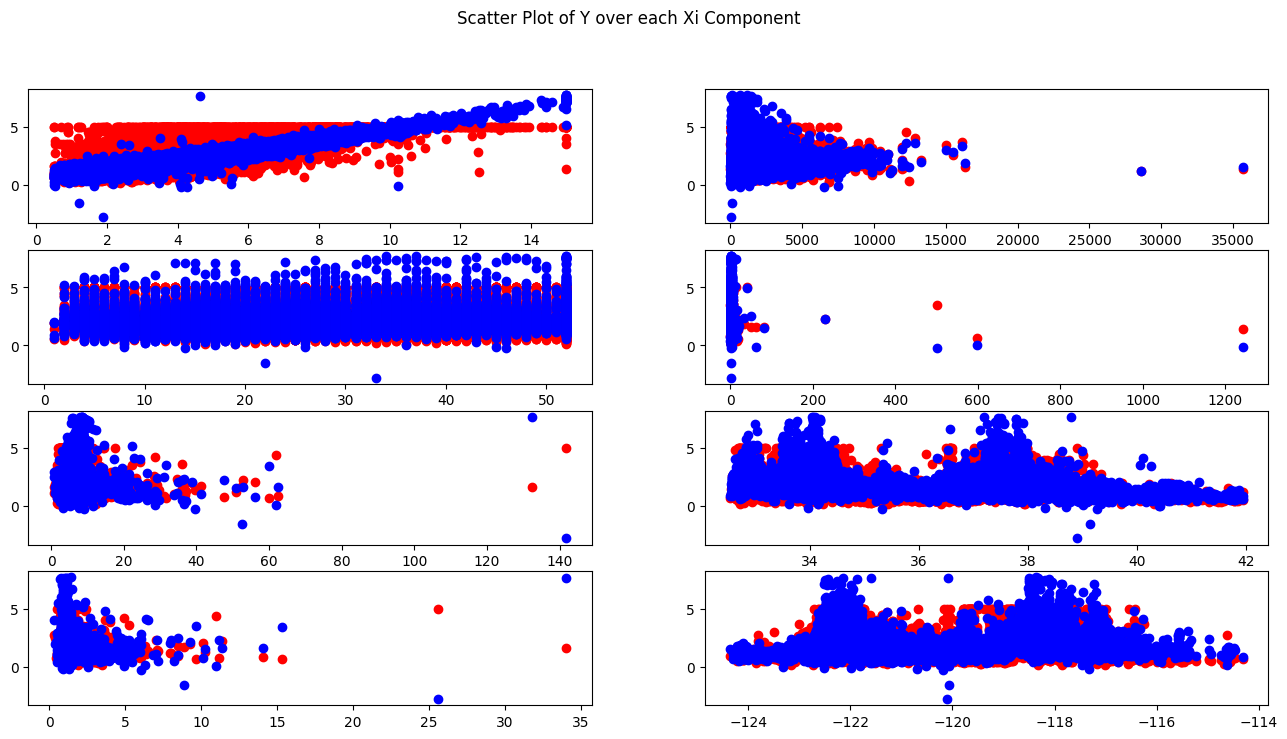

In [302]:
# Coordinated Scatters for Y = f(Xi, alpha)
fig, axs = plt.subplots(4, 2, figsize=(16, 8))

for i in range(4):
  for j in range(2):
    axs[i, j].scatter(X[ind_, i+j*4], y[ind_],      c='r', label='y')
    axs[i, j].scatter(X[ind_, i+j*4], y_pred_iter[ind_], c='b', label='y_pred')

fig.suptitle("Scatter Plot of Y over each Xi Component")
fig.show()

# **Comparación de Errores de cada Tipo de Solución**

In [304]:
def MSE(y_pred, y, lamb_=1e-3):
  loss = y_pred - y
  return np.mean(loss**2) + lamb_ * np.sum(alpha**2)

print(f"MSE Analítico: {MSE(y_pred, y)}")
print(f"MSE SVD: {MSE(y_pred_svd, y)}")
print(f"MSE Iterativo: {MSE(y_pred_iter, y)}")

MSE Analítico: 0.6052595354861927
MSE SVD: 0.6052595354861928
MSE Iterativo: 0.6052595354861927
